<h3>서포트벡터머신 테스트</h3>

<b>BMI(체질량 지수) = 몸무게(kg) / 키(cm) * 키(cm)</b>

In [ ]:
import random
import numpy as np

In [4]:
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return 'thin'
    if bmi < 25: return 'normal'
    return 'fat'

In [6]:
fp = open('bmi.csv', 'w', encoding='utf-8')
fp.write('height,weight,label\n')

# 무작위 자료 생성

cnt = {'thin':0, 'normal':0, 'fat':0}
random.seed(12)
for i in range(5000):
    h = random.randint(130,200)
    w = random.randint(35, 100)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write('{0},{1},{2}\n'.format(h,w,label))
    
fp.close()

print('저장 성공  결과')
print(cnt)

저장 성공  결과
{'thin': 1292, 'normal': 1384, 'fat': 2324}


In [8]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
tbl = pd.read_csv('bmi.csv')
tbl.head()

,height,weight,label
0,190,69,normal
1,197,79,normal
2,148,83,fat
3,131,82,fat
4,191,70,normal


In [47]:
w = tbl['weight']/100
h = tbl['height']/200
label = tbl['label']
wh = pd.concat([w,h], axis=1)
wh.head()

,weight,height
0,0.69,0.950
1,0.79,0.985
2,0.83,0.740
3,0.82,0.655
4,0.70,0.955


In [48]:
train_x, test_x, train_y, test_y = train_test_split(wh, label)

In [49]:
clf = svm.SVC().fit(train_x, train_y)

In [52]:
y_pred = clf.predict(test_x)

In [54]:
acc = metrics.accuracy_score(test_y, y_pred)
acc

0.9672

In [55]:
cl_report = metrics.classification_report(test_y, y_pred)

In [56]:
print('리포트 ', cl_report)

리포트               precision    recall  f1-score   support

        fat       0.98      0.97      0.98       599
     normal       0.92      0.97      0.94       340
       thin       1.00      0.96      0.98       311

avg / total       0.97      0.97      0.97      1250



In [76]:
# 데이터 타당성 검증 # cross validation
from sklearn import model_selection
model_selection.cross_val_score(clf, train_x, train_y, cv=5)  # cv=5 => kfold(5) 
# train train train train test  (5가지 경우에 대해 accuracy 확인)

array([0.95206391, 0.94666667, 0.968     , 0.96133333, 0.96395194])

In [68]:
# 시각화 
def scatter_func(lbl, color):
    b = tbl2.loc[lbl]
    plt.scatter(b['weight'], b['height'], c=color, label= lbl)

In [67]:
tbl2 = pd.read_csv("bmi.csv", index_col = 2)
print(tbl2.tail(3))
fig = plt.figure()

       height  weight
label                
thin      188      60
fat       141      52
thin      198      38


<Figure size 432x288 with 0 Axes>

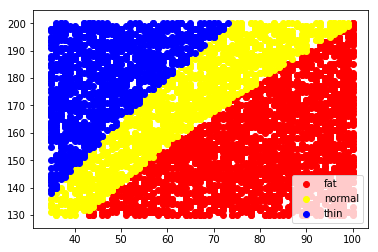

In [75]:
scatter_func('fat', 'red')
scatter_func('normal','yellow')
scatter_func('thin', 'blue')
plt.legend()
plt.savefig('bmi_test.png')
